<a href="https://colab.research.google.com/github/zoribecca/Data_Science_Practice_Projects/blob/main/Data_Analysis_Pipeline_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
# Load dataset
sales = pd.read_csv("/content/drive/MyDrive/3MTT WORKS/Datasets/Sales_Data_PH.csv")

In [4]:
sales.head()

,Date,Branch,Sales Agent,Products,Units,Price
0,09/01/2014,Woji,Chinedu,Apple,2,125.00
1,6/17/15,Woji,Emeka,Apple,5,125.00
2,09/10/2015,Woji,Ibrahim,Lenovo,7,1.29
3,11/17/15,Woji,Tolu,HP,11,4.99
4,10/31/15,Woji,Tonye,Lenovo,14,1.29


In [5]:
# Feature engineering
# Create a new column; Revenue
# Formula: Units * Price
sales["Revenue(N)"] = round(sales["Units"] * sales["Price"] * 1000, 2)

In [6]:
# Let's see if the change has been effected
sales.head()

,Date,Branch,Sales Agent,Products,Units,Price,Revenue(N)
0,09/01/2014,Woji,Chinedu,Apple,2,125.00,250000.0
1,6/17/15,Woji,Emeka,Apple,5,125.00,625000.0
2,09/10/2015,Woji,Ibrahim,Lenovo,7,1.29,9030.0
3,11/17/15,Woji,Tolu,HP,11,4.99,54890.0
4,10/31/15,Woji,Tonye,Lenovo,14,1.29,18060.0


In [7]:
# Check for data types
sales.dtypes

,0
Date,object
Branch,object
Sales Agent,object
Products,object
Units,int64
Price,float64
Revenue(N),float64


In [8]:
# Convert the date column to datetime
sales["Date"] = pd.to_datetime(sales["Date"], format="mixed")


In [9]:
sales.head()

,Date,Branch,Sales Agent,Products,Units,Price,Revenue(N)
0,2014-09-01,Woji,Chinedu,Apple,2,125.00,250000.0
1,2015-06-17,Woji,Emeka,Apple,5,125.00,625000.0
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9030.0
3,2015-11-17,Woji,Tolu,HP,11,4.99,54890.0
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29,18060.0


In [10]:
sales["Year"] = sales["Date"].dt.year
sales["Month"] = sales["Date"].dt.month_name()
sales["Day"] = sales["Date"].dt.day_name()

In [11]:
sales.head()

,Date,Branch,Sales Agent,Products,Units,Price,Revenue(N),Year,Month,Day
0,2014-09-01,Woji,Chinedu,Apple,2,125.00,250000.0,2014,September,Monday
1,2015-06-17,Woji,Emeka,Apple,5,125.00,625000.0,2015,June,Wednesday
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9030.0,2015,September,Thursday
3,2015-11-17,Woji,Tolu,HP,11,4.99,54890.0,2015,November,Tuesday
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29,18060.0,2015,October,Saturday


# **KPI**

In [12]:
# Total units sold
total_unit_sold = sales["Units"]. sum()
print(f"Total unit sold: {total_unit_sold} units")

Total unit sold: 2121 units


In [13]:
# Total Revenue
total_revenue = sales["Revenue(N)"]. sum()
print(f"Total Revenue: {total_revenue}")

Total Revenue: 19627880.0


In [14]:
# Average Revenue per unit
# I used the round() function to approximate to 2 decimal places
average_revenue_per_unit = round(total_revenue / total_unit_sold, 2)
print(f"Average revenue per unit: {average_revenue_per_unit}")

Average revenue per unit: 9254.07


In [15]:
# Number of products
# .nunique() shows the numbers of unique values
number_of_products = sales["Products"]. nunique()
print(f"Number of products: {number_of_products}")

Number of products: 5


In [16]:
# Number of sales agents
number_of_sales_agents = sales["Sales Agent"]. nunique()
print(f"Number of sales agents: {number_of_sales_agents}")

Number of sales agents: 11


# **Insights**

In [17]:
# Set index using the date column
sales.set_index("Date", inplace = True)

In [18]:
sales.head(20)

,Branch,Sales Agent,Products,Units,Price,Revenue(N),Year,Month,Day
Date,,,,,,,,,
2014-09-01,Woji,Chinedu,Apple,2,125.00,250000.0,2014,September,Monday
2015-06-17,Woji,Emeka,Apple,5,125.00,625000.0,2015,June,Wednesday
2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9030.0,2015,September,Thursday
2015-11-17,Woji,Tolu,HP,11,4.99,54890.0,2015,November,Tuesday
2015-10-31,Woji,Tonye,Lenovo,14,1.29,18060.0,2015,October,Saturday
2014-02-26,Woji,Ibrahim,Compaq,27,19.99,539730.0,2014,February,Wednesday
2014-10-05,Woji,George,HP,28,8.99,251720.0,2014,October,Sunday
2015-12-21,Woji,Tonye,HP,28,4.99,139720.0,2015,December,Monday
2014-02-09,Woji,Tolu,Lenovo,36,4.99,179640.0,2014,February,Sunday


# **Total Monthly revenue for year 2015**

In [19]:
# Filtering
# Monthly revenue in 2015
sales_2015 = sales[sales["Year"] == 2015]
sales_2015.head(5)

,Branch,Sales Agent,Products,Units,Price,Revenue(N),Year,Month,Day
Date,,,,,,,,,
2015-06-17,Woji,Emeka,Apple,5,125.00,625000.0,2015,June,Wednesday
2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9030.0,2015,September,Thursday
2015-11-17,Woji,Tolu,HP,11,4.99,54890.0,2015,November,Tuesday
2015-10-31,Woji,Tonye,Lenovo,14,1.29,18060.0,2015,October,Saturday
2015-12-21,Woji,Tonye,HP,28,4.99,139720.0,2015,December,Monday


In [20]:
# Sorting
# Total monthly revenue in 2015
# To arrange the output based on index I used the .sort_index()
total_monthly_revenue = sales_2015.groupby("Month")["Revenue(N)"]. sum().sort_index()
total_monthly_revenue

,Revenue(N)
Month,
April,610380.0
August,1830900.0
December,2018780.0
February,1324960.0
January,413540.0
July,996330.0
June,625000.0
March,389430.0
May,787570.0


In [21]:
# To arrange the output based on values, I used the .sort_values()
total_monthly_revenue = sales_2015.groupby("Month")["Revenue(N)"] .sum() .sort_values()
total_monthly_revenue

,Revenue(N)
Month,
November,54890.0
September,160270.0
March,389430.0
January,413540.0
April,610380.0
June,625000.0
May,787570.0
July,996330.0
October,1157490.0


<Axes: xlabel='Month', ylabel='Revenue)'>

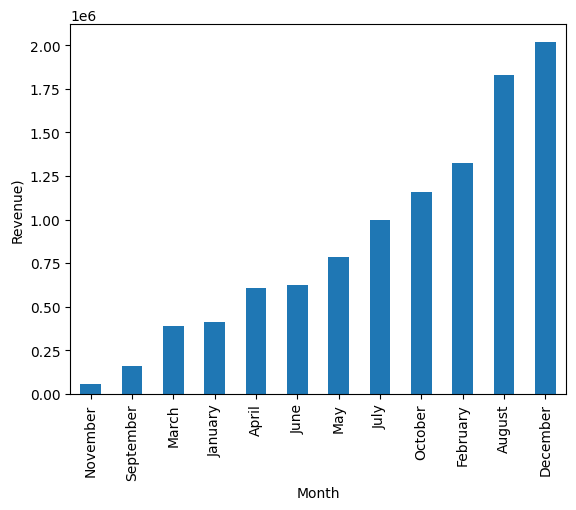

In [22]:
# Using Panda to plot a bar chart
total_monthly_revenue.plot(kind = "bar", xlabel = "Month", ylabel = "Revenue)")

In [23]:
# Using seaborn to plot aa bar chart

In [24]:
import seaborn as sns

<Axes: ylabel='Month'>

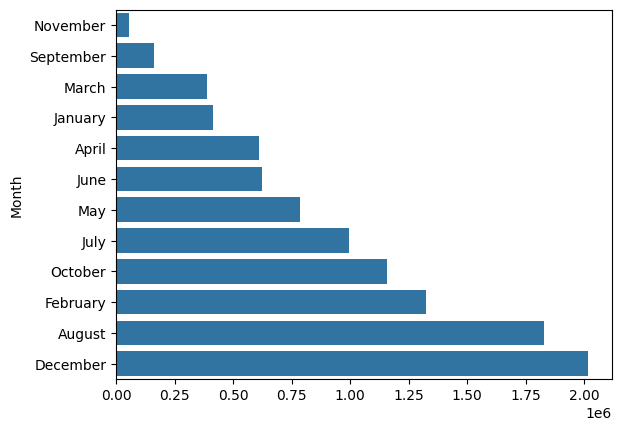

In [25]:
sns.barplot(x = total_monthly_revenue.values, y = total_monthly_revenue.index, orient = "h")

In [26]:
# Using matplotlib to plot a bar chart
import matplotlib.pyplot as plt

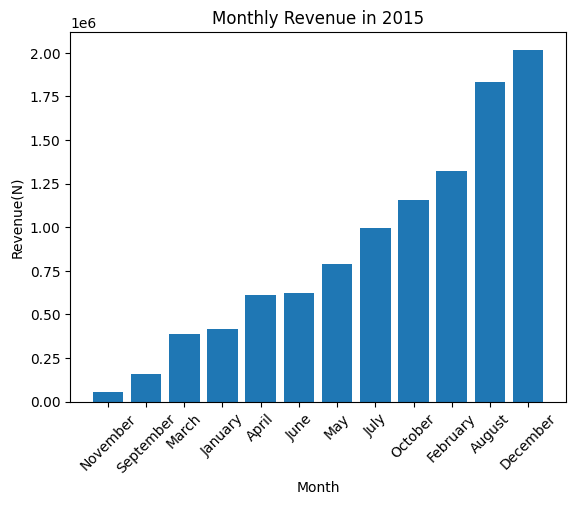

In [27]:
plt.bar(total_monthly_revenue.index, total_monthly_revenue.values)
plt.xlabel("Month")
plt.ylabel("Revenue(N)")
plt.title("Monthly Revenue in 2015")
plt.xticks(rotation = 45)
plt.show()

In [28]:
# Total revenue by branch
# Let's check the branches available
sales["Branch"].unique()

array(['Woji', 'GRA', 'Town'], dtype=object)

In [29]:
total_revenue_by_branch = sales.groupby("Branch")["Revenue(N)"].sum() .sort_values(ascending = False)
total_revenue_by_branch

,Revenue(N)
Branch,
Woji,11139070.0
GRA,6002090.0
Town,2486720.0


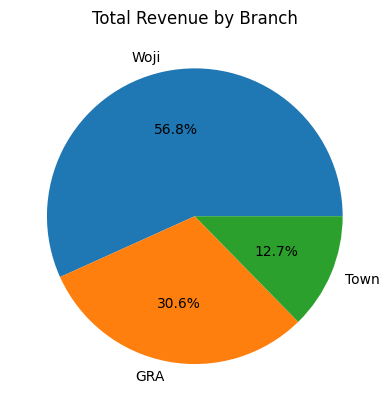

In [30]:
# Using Matplotlib to plot a Pie chart
plt.pie(total_revenue_by_branch.values, labels = total_revenue_by_branch.index, autopct = "%1.1f%%")
plt.title("Total Revenue by Branch")
plt.show()

In [31]:
# Total revenue by products
# Let's chech the available products
sales["Products"].unique()

array(['Apple', 'Lenovo', 'HP', 'Compaq', 'Dell'], dtype=object)

In [32]:
total_revenue_by_products = sales.groupby("Products")["Revenue(N)"].sum() .sort_values()
total_revenue_by_products

,Revenue(N)
Products,
Apple,1700000.0
Compaq,2045220.0
Lenovo,2135140.0
Dell,4169870.0
HP,9577650.0


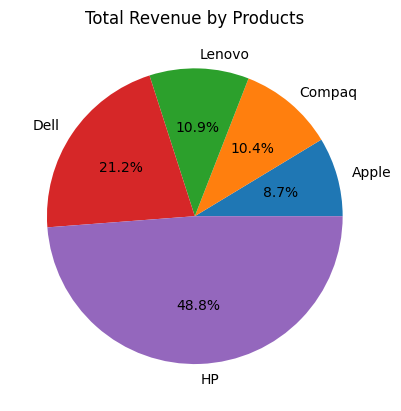

In [33]:
# Using Matplotlib to plot a pie chart
plt.pie(total_revenue_by_products.values, labels = total_revenue_by_products.index, autopct = "%1.1f%%")
plt.title("Total Revenue by Products")
plt.show()

In [34]:
# Total revenue by sales agents
# Let's check the sales agents available
sales["Sales Agent"].unique()

array(['Chinedu', 'Emeka', 'Ibrahim', 'Tolu', 'Tonye', 'George',
       'Blessing', 'Chioma', 'Torbari', 'Uche', 'Tunde'], dtype=object)

In [35]:
total_revenue_by_sales_agents = sales.groupby("Sales Agent")["Revenue(N)"].sum() .sort_values()
total_revenue_by_sales_agents

,Revenue(N)
Sales Agent,
Tonye,438370.0
Torbari,536750.0
Tunde,1203110.0
Uche,1283610.0
George,1387770.0
Chinedu,1641430.0
Ibrahim,1749870.0
Blessing,2363040.0
Tolu,2812190.0


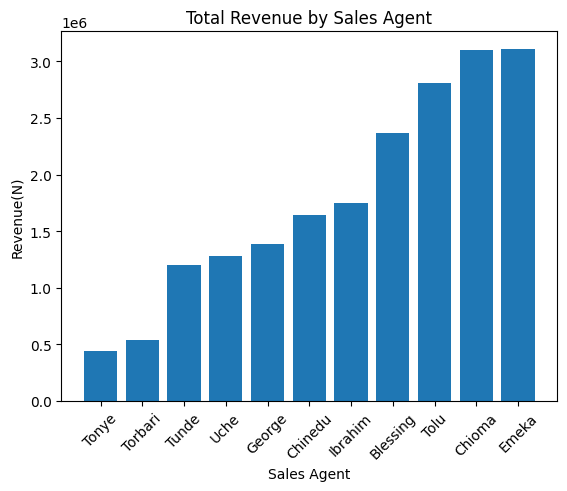

In [36]:
# Using Matplotlib to plot a bar chart
plt.bar(total_revenue_by_sales_agents.index, total_revenue_by_sales_agents.values)
plt.xlabel("Sales Agent")
plt.ylabel("Revenue(N)")
plt.title("Total Revenue by Sales Agent")
plt.xticks(rotation = 45)
plt.show()

In [37]:
# Total revenue by week
total_revenue_by_week = sales.groupby("Day")["Revenue(N)"].sum() .sort_values(ascending = False)
total_revenue_by_week

,Revenue(N)
Day,
Monday,3515170.0
Friday,3426630.0
Tuesday,3388970.0
Wednesday,3348580.0
Sunday,3146200.0
Thursday,1809960.0
Saturday,992370.0


<Axes: xlabel='Day'>

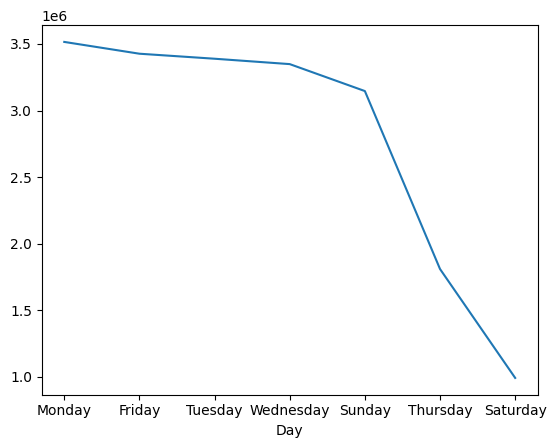

In [38]:
# Using seaborn to plot a line chart
sns.lineplot(x = total_revenue_by_week.index, y = total_revenue_by_week.values)

In [39]:
# Total revenue by month
total_revenue_by_month = sales.groupby("Month")["Revenue(N)"].sum() .sort_values(ascending = False)
total_revenue_by_month

,Revenue(N)
Month,
December,3288470.0
July,2673230.0
February,2044330.0
August,2005550.0
October,1984570.0
June,1613500.0
January,1602090.0
May,1300350.0
April,1059030.0


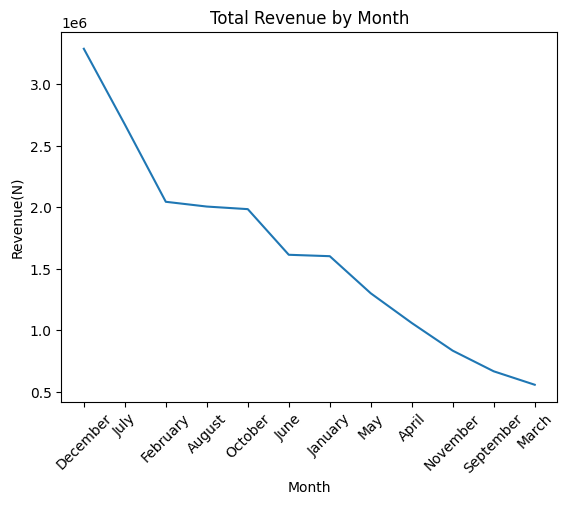

In [40]:
# Using Matplotlib to plot a line chart
plt.plot(total_revenue_by_month.index, total_revenue_by_month.values)
plt.xlabel("Month")
plt.ylabel("Revenue(N)")
plt.title("Total Revenue by Month")
plt.xticks(rotation = 45)
plt.show()

In [41]:
# Trend of sales
trend_of_sales = sales.groupby(["Year", "Month"])["Revenue(N)"].sum() .sort_index()
trend_of_sales

Year  Month    
2014  April         448650.0
      August        174650.0
      December     1269690.0
      February      719370.0
      January      1188550.0
      July         1676900.0
      June          988500.0
      March         167440.0
      May           512780.0
      November      778890.0
      October       827080.0
      September     505840.0
2015  April         610380.0
      August       1830900.0
      December     2018780.0
      February     1324960.0
      January       413540.0
      July          996330.0
      June          625000.0
      March         389430.0
      May           787570.0
      November       54890.0
      October      1157490.0
      September     160270.0
Name: Revenue(N), dtype: float64

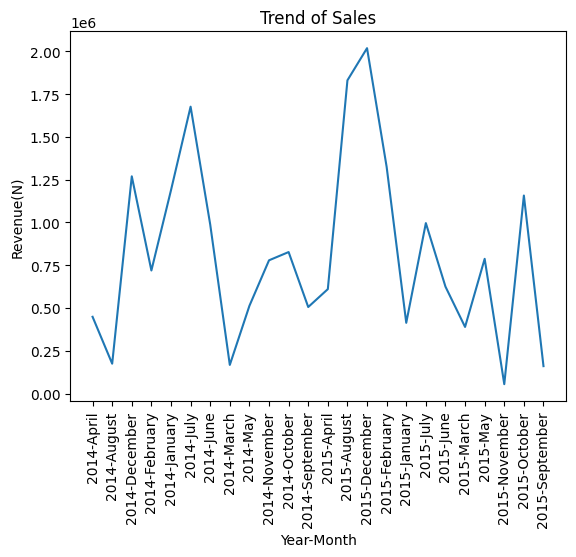

In [42]:
# using matplotlib to plot a line chart
# Convert the MultiIndex to a list of strings for plotting
x_values = [f"{year}-{month}" for year, month in trend_of_sales.index]

plt.plot(x_values, trend_of_sales.values)
plt.xlabel("Year-Month") # Update the x-axis label
plt.ylabel("Revenue(N)")
plt.title("Trend of Sales")
plt.xticks(rotation = 90)
plt.show()

# Total Monthly revenue for year 2014

In [43]:
# Filtering for 2014
sales_2014 = sales[sales["Year"] == 2014]
sales_2014.head(5)

,Branch,Sales Agent,Products,Units,Price,Revenue(N),Year,Month,Day
Date,,,,,,,,,
2014-09-01,Woji,Chinedu,Apple,2,125.00,250000.0,2014,September,Monday
2014-02-26,Woji,Ibrahim,Compaq,27,19.99,539730.0,2014,February,Wednesday
2014-10-05,Woji,George,HP,28,8.99,251720.0,2014,October,Sunday
2014-02-09,Woji,Tolu,Lenovo,36,4.99,179640.0,2014,February,Sunday
2014-01-23,Woji,Emeka,HP,50,19.99,999500.0,2014,January,Thursday


In [44]:
# Sorting based on index
total_monthly_revenue = sales_2014.groupby("Month")["Revenue(N)"]. sum().sort_index()
total_monthly_revenue

,Revenue(N)
Month,
April,448650.0
August,174650.0
December,1269690.0
February,719370.0
January,1188550.0
July,1676900.0
June,988500.0
March,167440.0
May,512780.0


In [45]:
# Sorting based on values
total_monthly_revenue = sales_2014.groupby("Month")["Revenue(N)"]. sum().sort_values()
total_monthly_revenue

,Revenue(N)
Month,
March,167440.0
August,174650.0
April,448650.0
September,505840.0
May,512780.0
February,719370.0
November,778890.0
October,827080.0
June,988500.0


<Axes: ylabel='Month'>

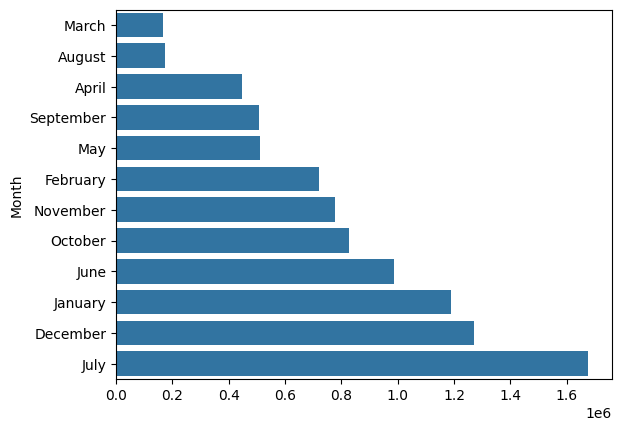

In [46]:
# Using Seaborn to plot a bar chart
sns.barplot(x = total_monthly_revenue.values, y = total_monthly_revenue.index, orient = "h")

In [47]:
# Total revenue by branch
total_revenue_by_branch = sales_2014.groupby("Branch")["Revenue(N)"].sum() .sort_values(ascending = False)
total_revenue_by_branch

,Revenue(N)
Branch,
GRA,5193710.0
Woji,3833510.0
Town,231120.0


Text(0.5, 1.0, 'Total Revenue by Branch')

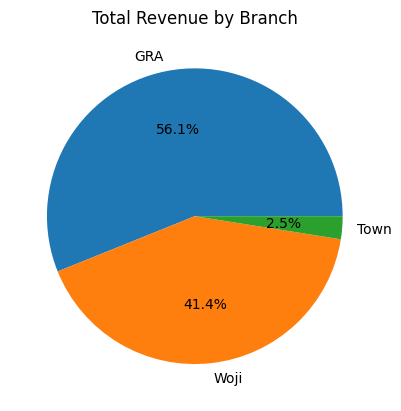

In [48]:
# Using Matplotlib to plot a pie chart
plt.pie(total_revenue_by_branch.values, labels = total_revenue_by_branch.index, autopct = "%1.1f%%")
plt.title("Total Revenue by Branch")


In [49]:
# Total revenue by products
total_revenue_by_products = sales_2014.groupby("Products")["Revenue(N)"].sum() .sort_values(ascending = False)
total_revenue_by_products

,Revenue(N)
Products,
HP,3766920.0
Dell,1918140.0
Lenovo,1908340.0
Compaq,1414940.0
Apple,250000.0


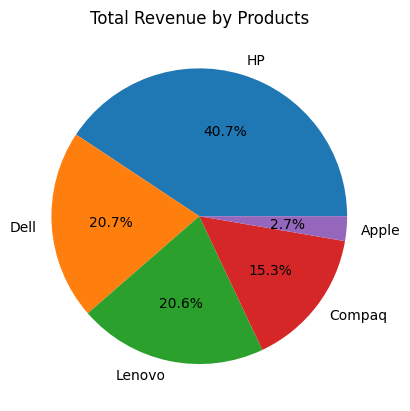

In [50]:
# Using Matplotlib to create a pie chart
plt.pie(total_revenue_by_products.values, labels = total_revenue_by_products.index, autopct = "%1.1f%%")
plt.title("Total Revenue by Products")
plt.show()


In [51]:
# Totall revenue by sales agent
total_revenue_by_sales_agent = sales_2014.groupby("Sales Agent")["Revenue(N)"].sum() .sort_values()
total_revenue_by_sales_agent

,Revenue(N)
Sales Agent,
Torbari,57710.0
Tunde,63680.0
Tonye,149250.0
Uche,167440.0
Chinedu,336430.0
Ibrahim,539730.0
Tolu,628740.0
George,700820.0
Emeka,1478540.0


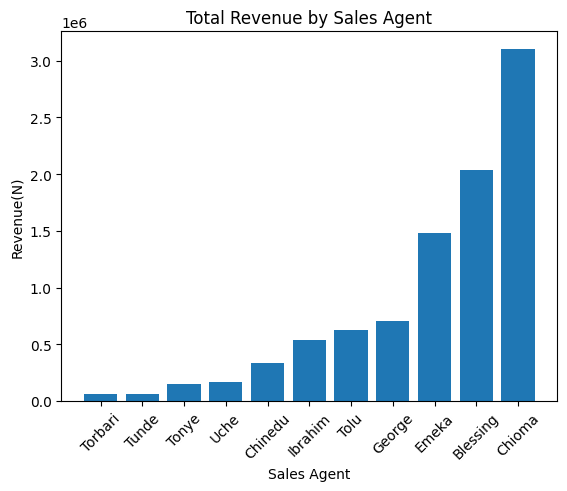

In [52]:
# Using Matplotlib to plot a bar chart
plt.bar(total_revenue_by_sales_agent.index, total_revenue_by_sales_agent.values)
plt.xlabel("Sales Agent")
plt.ylabel("Revenue(N)")
plt.title("Total Revenue by Sales Agent")
plt.xticks(rotation = 45)
plt.show()



In [53]:
# Total revenue by week
total_revenue_by_week = sales_2014.groupby("Day")["Revenue(N)"].sum() .sort_values(ascending = False)
total_revenue_by_week

,Revenue(N)
Day,
Tuesday,2397630.0
Monday,2071410.0
Wednesday,1564190.0
Thursday,1319020.0
Sunday,970760.0
Saturday,525000.0
Friday,410330.0


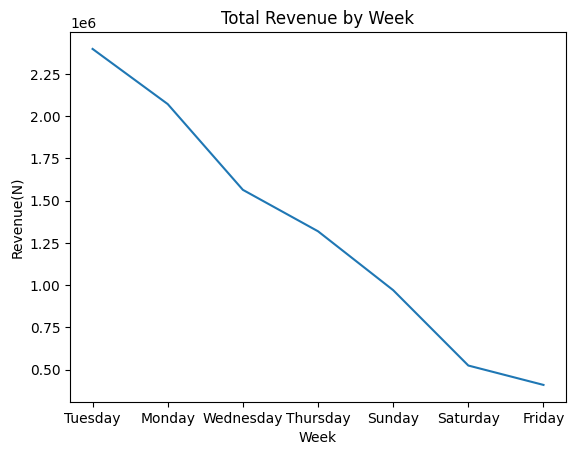

In [54]:
# Using Matplotlib to plot a line chart
plt.plot(total_revenue_by_week.index, total_revenue_by_week.values)
plt.xlabel("Week")
plt.ylabel("Revenue(N)")
plt.title("Total Revenue by Week")
plt.show()

In [55]:
# Total revenue by month
total_revenue_by_month = sales_2014.groupby("Month")["Revenue(N)"].sum() .sort_values(ascending = False)
total_revenue_by_month

,Revenue(N)
Month,
July,1676900.0
December,1269690.0
January,1188550.0
June,988500.0
October,827080.0
November,778890.0
February,719370.0
May,512780.0
September,505840.0


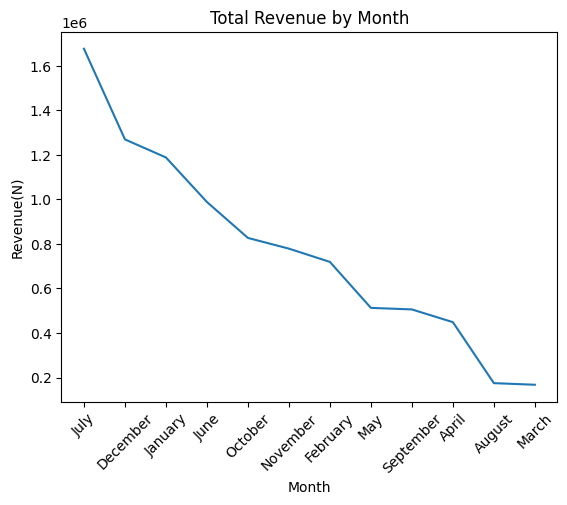

In [56]:
# Using Matplotlib to create a line chart
plt.plot(total_revenue_by_month.index, total_revenue_by_month.values)
plt.xlabel("Month")
plt.ylabel("Revenue(N)")
plt.title("Total Revenue by Month")
plt.xticks(rotation = 45)
plt.show()